# Project 1 IRWA

In [1]:
# Standard library imports
import math
import os
import sys
import time
from collections import defaultdict
from array import array

# Third-party imports
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from numpy import linalg as la
try:
    nltk.data.find('corpora/stopwords.zip')
except LookupError:
    nltk.download('stopwords')

# Local application
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()
project_root = os.path.join(current_dir, '..')
if project_root not in sys.path:
    sys.path.append(project_root)
import irwa.loading as ild  
import irwa.build_index as ibi

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load the tweets

In [2]:
file_path = '../data/farmers-protest-tweets.json'
tweets = ild.load_all_tweets(file_path)
print(f"Loaded {len(tweets)} tweets")

Loaded 117407 tweets


In [3]:
tweet_document_ids_map_df = "../data/tweet_document_ids_map.csv"
token_tweets = ild.create_tokenized_dictionary(tweets, tweet_document_ids_map_df)


### Exploratory Data Analysis

In [9]:
import pandas as pd
import re
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from statistics import mean
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Word Count

In [11]:
def word_count(tweets, top_words):
    """
    Perform word count on the tweet content stored in tweet_index.

    Arguments:
    tweet_index -- dictionary mapping tweet IDs to tweet content

    Returns:
    word_counts -- Counter object with word frequencies
    most_common_words -- list of tuples with the most common words and their frequencies
    """

    # Step 1: Flatten the list of lists into a single list of words
    all_words = list(chain.from_iterable(tweets.values()))

    # Step 2: Count the frequency of each word
    word_counts = Counter(all_words)

    # Step 3: Get the 10 most common words
    most_common_words = word_counts.most_common(top_words)

    return word_counts, most_common_words



def plot_word_counts(most_common_words):
    """
    Create a horizontal bar plot for the most common words with counts.

    Arguments:
    word_counts -- Counter object with word frequencies
    most_common_words -- list of tuples with the most common words and their frequencies
    """
    most_common_words.sort(key=lambda x: x[1], reverse=True)
    words, counts = zip(*most_common_words)  # Unzip the list of tuples

    # Normalize counts for color gradient
    norm_counts = np.array(counts) / max(counts)

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6 + len(most_common_words) * 0.25))  # Adjust height based on number of words
    bars = plt.barh(words, counts, color=plt.cm.Blues(norm_counts))

    # Add labels to bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), 
                 ha='left', va='center', fontsize=10)

    plt.title('Most Common Words in Tweets')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()



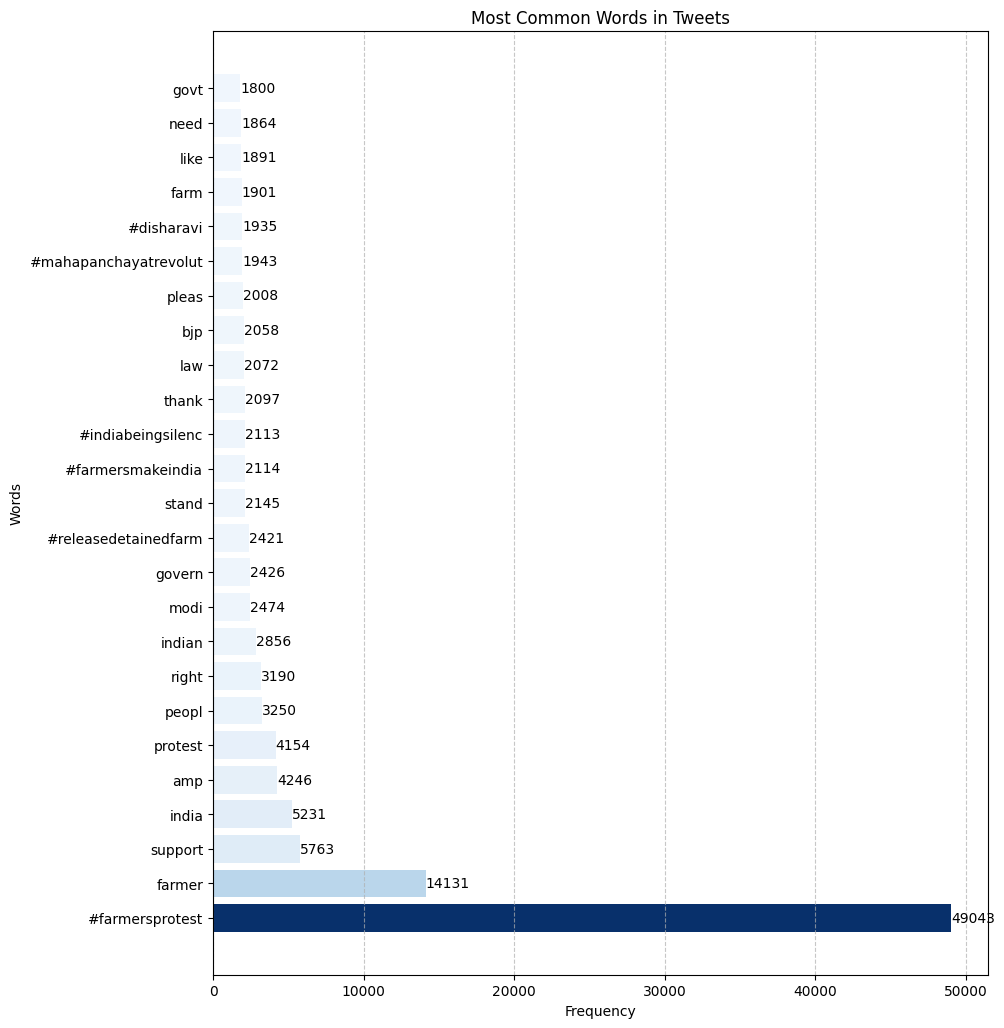

In [12]:
# Example usage
word_counts, most_common_words = word_count(token_tweets, 25)
plot_word_counts(most_common_words)

Average Sentence Length

In [14]:
def average_sentence_length(token_tweets):
    sentence_lengths = []

    for tokenized_content in token_tweets.values():
        # Each entry in token_tweets is already tokenized into words
        # Assume each tokenized entry corresponds to one "sentence"
        sentence_count = 1  # Since tokenized_content corresponds to one document (one "sentence")
        word_count = len(tokenized_content)  # Number of words in the tokenized content

        avg_length = word_count / sentence_count
        sentence_lengths.append(avg_length)

    # Compute overall average sentence length
    avg_sentence_length = mean(sentence_lengths)
    return avg_sentence_length
avg_sentence_length = average_sentence_length(token_tweets)

print(f"📊 Average Sentence Length")
print(f"-----------------------------------")
print(f"The average sentence length is {avg_sentence_length:.2f} words")


📊 Average Sentence Length
-----------------------------------
The average sentence length is 15.12 words


Vocabulary Size

Top 10 most retweeted tweets: [(1360169510079111173, 7723), (1364148079117615105, 6164), (1360882069161803779, 4673), (1360908603155050498, 3742), (1360162861419425795, 3332), (1361790921902338048, 3230), (1360260269646237699, 3182), (1361897874582249474, 3057), (1363090557984141315, 3040), (1363376268784267268, 2622)]


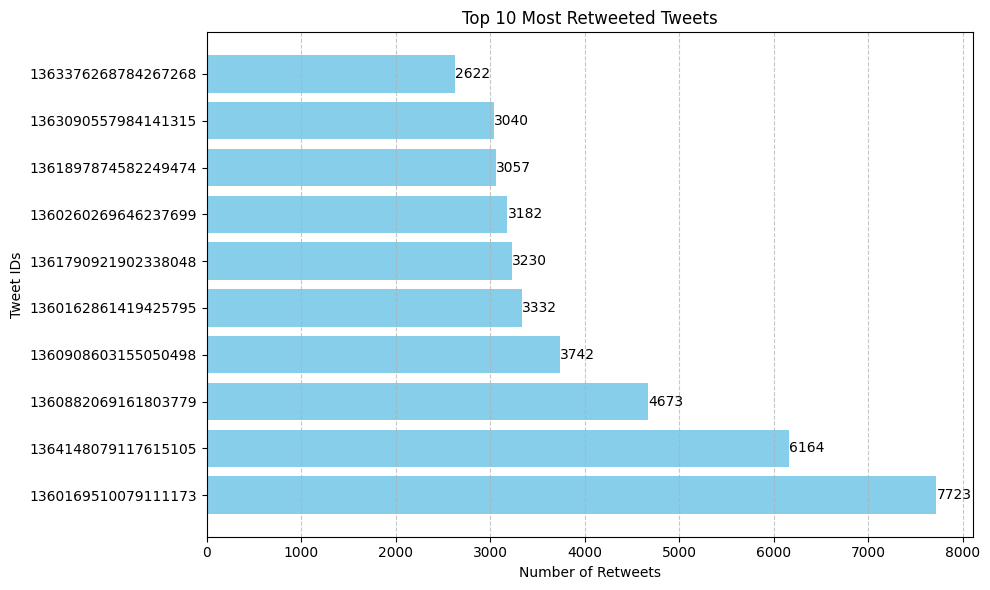

In [15]:
def rank_tweets_by_retweets(tweets):
    ranked_tweets = sorted(tweets, key=lambda tweet: tweet._retweet_count, reverse=True)
    top_retweets = [(tweet._tweet_id, tweet._retweet_count) for tweet in ranked_tweets[:10]]  # Top 10 retweeted tweets
    return top_retweets

top_retweeted_tweets = rank_tweets_by_retweets(tweets)
print("Top 10 most retweeted tweets:", top_retweeted_tweets)


def plot_top_retweeted_tweets(top_retweeted_tweets):
    """
    Plot a horizontal bar chart of the top retweeted tweets.

    Arguments:
    top_retweeted_tweets -- list of tuples containing tweet IDs and their retweet counts
    """
    
    # Check if the input list is empty
    if not top_retweeted_tweets:
        print("No tweets to display.")
        return
    
    # Unzip the tweet IDs and retweet counts
    tweet_ids, retweet_counts = zip(*top_retweeted_tweets)
    tweet_ids = list(map(str, tweet_ids))  # Convert tweet IDs to string if necessary

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(tweet_ids, retweet_counts, color='skyblue')

    # Add labels to the bars
    for bar, count in zip(bars, retweet_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(count), 
                 va='center', ha='left', fontsize=10)

    plt.title('Top 10 Most Retweeted Tweets')
    plt.xlabel('Number of Retweets')
    plt.ylabel('Tweet IDs')
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
    plt.tight_layout()
    plt.show()

# Example usage
plot_top_retweeted_tweets(top_retweeted_tweets)



Word Cloud

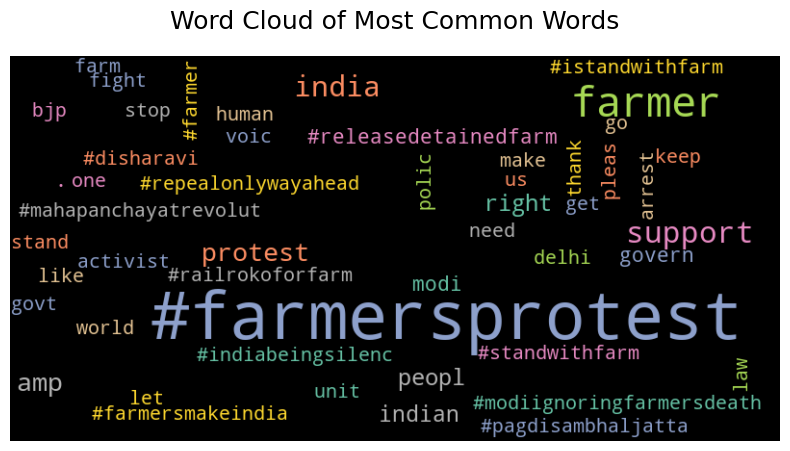

In [16]:
def create_word_cloud(word_counts, top_words):
    """
    Generate a visually appealing word cloud from word frequencies.

    Arguments:
    word_counts -- Counter object with word frequencies
    top_words -- Number of top words to display in the word cloud
    """
    
    # Get the most common words
    most_common_words = word_counts.most_common(top_words)

    # Create a WordCloud object with custom settings
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',  # Dark background for contrast
        colormap='Set2',           # Color palette for the words
        max_words=top_words,       # Maximum number of words to display
    ).generate_from_frequencies(dict(most_common_words))

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axis
    plt.title('Word Cloud of Most Common Words', fontsize=18, color='black', pad=20)
    plt.show()
# Use the word counts from the earlier analysis
create_word_cloud(word_counts, 50)


Named Entities

In [18]:
def entity_recognition_nltk(token_tweets):
    entities = []
    
    for tokenized_content in token_tweets.values():
        # No need to tokenize; tokenized_content is already a list of words
        pos_tags = nltk.pos_tag(tokenized_content)  # POS tagging
        
        # Perform Named Entity Recognition (NER)
        tree = nltk.ne_chunk(pos_tags, binary=True)  # NER with binary=True (labels everything as NE or not)

        # Extract named entities
        for subtree in tree:
            if hasattr(subtree, 'label') and subtree.label() == 'NE':  # Check for named entities
                entity = " ".join([word for word, tag in subtree])  # Join words to form the entity
                entities.append(entity)
    
    return entities

named_entities = entity_recognition_nltk(token_tweets)
print("Named entities:", named_entities)


Named entities: ['mr.', 'mr.', '👌well', '▪️gobar', '𝗘𝗩𝗜𝗟', '𝗕𝗮𝗱 𝗟𝗮𝘄𝘀 𝗥𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀', '𝗘𝗩𝗜𝗟', '𝗕𝗮𝗱 𝗟𝗮𝘄𝘀 𝗥𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀', 'ਸਬਰ', '𝗧𝗵𝗲 𝗙𝗼𝘂𝗻𝗱𝗲𝗿𝘀', 'u.s.', 'u.s.', 'u.s.', '𝗕𝗝𝗣', '𝗖𝗔𝗥', 'ਵਤਨवतन', 'समझ', '#metromansreedharan', 'u.s.', 'wasn’t', '𝐏𝐡𝐨𝐭𝐨𝐬', '𝗙𝗿𝗲𝗲𝗱𝗼𝗺 𝗧𝗵𝗲 𝗪𝗼𝗹𝘃𝗲𝘀', '𝗗𝗲𝗮𝘁𝗵 𝗧𝗵𝗲 𝗦𝗵𝗲𝗲𝗽', '𝗥𝗲𝘃𝗼𝗹𝘂𝘁𝗶𝗼𝗻 𝗡𝗼', '𝗠𝗼𝘂𝗻𝘁', '𝗥𝗲𝘃𝗼𝗹𝘂𝘁𝗶𝗼𝗻 𝗡𝗼', '𝗠𝗼𝘂𝗻𝘁', 'अगर', '𝐂𝐎𝐌𝐄', '𝙏𝙝𝙤𝙙𝙞 𝘿𝙖𝙧𝙖𝙣𝙚', 'u.s.', '𝗖𝘂𝗹𝘁𝗶𝘃𝗮𝘁𝗼𝗿𝘀 𝗧𝗵𝗲 𝗘𝗮𝗿𝘁𝗵', '𝗩𝗶𝗴𝗼𝗿𝗼𝘂𝘀 𝗜𝗻𝗱𝗲𝗽𝗲𝗻𝗱𝗲𝗻𝘁 𝗩𝗶𝗿𝘁𝘂𝗼𝘂𝘀 𝗧𝗶𝗲𝗱', '𝗪𝗲𝗱𝗱𝗲𝗱', '𝗟𝗶𝗯𝗲𝗿𝘁𝘆', '𝗟𝗮𝘀𝘁𝗶𝗻𝗴', 'u.s.', 'u.s.', 'u.s.', '𝙎𝙃𝘼𝙍𝙀', '𝘼𝙉𝘿', '𝙎𝙐𝙋𝙋𝙊𝙍𝙏', 'u.s.', 'u.s.', 'u.s.', '𝙉𝙞𝙠𝙞𝙩𝙖 𝙅𝙖𝙘𝙤𝙗', '𝗪𝗶𝘁𝗵𝗵𝗼𝗹𝗱𝗶𝗻𝗴 𝗜𝗻𝗳𝗼𝗿𝗺𝗮𝘁𝗶𝗼𝗻 𝗘𝘀𝘀𝗲𝗻𝗰𝗲', 'mr.', '𝘾𝙡𝙞𝙢𝙖𝙩𝙚', '𝗗𝗲𝗮𝘁𝗵𝘀 𝗩𝗮𝗹𝗶𝗮𝗻𝘁 𝗡𝗲𝘃𝗲𝗿 𝗧𝗮𝘀𝘁𝗲 𝗗𝗲𝗮𝘁𝗵 𝗕𝘂𝘁', 'mr.', '#kanganaranaut', 'mr.', 'mr.', 'मतलब', 'ਗਲਤ', 'ਤਨ ਮਨ', '𝗦𝗼𝗺𝗲𝘁𝗶𝗺𝗲𝘀', '𝗟𝗼𝘀𝗲 𝗧𝗵𝗲𝗶𝗿 𝗥𝗶𝗴𝗵𝘁', '𝗦𝗶𝗹𝗲𝗻𝘁 𝗣𝗿𝗲𝘀𝘀𝘂𝗿𝗲𝗱 𝗧𝗼 𝗥𝗲𝗺𝗮𝗶𝗻', '“modi', 'ਅਣਖ', '𝗣𝗿𝗲𝘃𝗲𝗻𝘁 𝗜𝗻𝗷𝘂𝘀𝘁𝗶𝗰𝗲', '𝗧𝗶𝗺𝗲 𝗪𝗲 𝗙𝗮𝗶𝗹 𝗧𝗼', '𝙎𝙃𝘼𝙈𝙀']


In [41]:
def display_entities(entities):
    # Count the unique named entities
    unique_entities = set(entities)
    entity_count = len(unique_entities)
    
    # Print the count of unique named entities
    print(f"Total unique named entities found: {entity_count}\n")
    
    # Print each unique entity
    print("Unique Named Entities:")
    for entity in unique_entities:
        print(f"- {entity}")

display_entities(named_entities)

Total unique named entities found: 23132

Unique Named Entities:
- Saudi Arabia
- DevilOnline24 Ha
- Paranoid
- Thirty Hazare Court
- ALL Social Media
- Flaunt
- NEW VIDEO
- FarmersProtest Thanks
- TaraGandhi
- TO STAY
- Pakistan Military Lands
- SatyaHindi
- Loud
- Environmentalist
- Assets
- Gender Equality Protest
- YEAR
- MehekF
- BJP Fascist
- Gurwin Singh Ahuja
- Helm
- IStandWithFarmers Sedition
- Pagrhi Sambhal Jatta
- Singhu Border Protest Site
- Wowww
- FarmersProtest Okk
- Company
- iParwinder
- Bete
- Haryana CM Manohar Lal Khattar
- DieselPriceHike No
- GretaGoToSchool
- Main Kisan Hoon
- Bitter Truth
- आपस
- FarmersPRotest
- ਕਲਮ
- India Support Farmers
- Incase
- Munavar Rana
- Lingayat
- haloFolded
- Tractor2twitr Totally
- DamanVirodhiDiwas
- INCIndiaLive
- आज कल
- RajatSharmaLive Dalal Godi Media
- Thanx Khalsa Aid
- Delhi HC
- DeepakMittal
- Are Greta And Rihanna
- Lah
- Att
- IndiaForSikhs
- SFJ Counsels To Declare Independence
- Jorawar Singh Ji
- हम
- Bhaji
- Pover

In [43]:
# Ensure VADER lexicon is downloaded
nltk.download('vader_lexicon')

def analyze_sentiment_vader(tweet_index):
    nltk_sentiment_analyzer = SentimentIntensityAnalyzer()
    sentiments = {}
    for tweet_id, content in tweet_index.items():
        score = nltk_sentiment_analyzer.polarity_scores(content)
        sentiments[tweet_id] = score['compound']  # Compound score ranges from -1 (negative) to 1 (positive)
    return sentiments

# Example usage
sentiment_scores = analyze_sentiment_vader(tweet_index)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...


{1364506249291784198: -0.8176, 1364506237451313155: 0.836, 1364506195453767680: 0.0, 1364506167226032128: 0.0, 1364506144002088963: 0.0, 1364506120497360896: 0.0, 1364506076272496640: 0.0, 1364505995859423234: 0.0, 1364505991887347714: 0.0, 1364505896576053248: 0.0, 1364505892612268032: 0.0, 1364505813834989568: 0.0, 1364505749359976448: -0.25, 1364505737695739906: 0.0, 1364505706804744192: 0.0, 1364505702715154439: 0.0, 1364505676375076867: 0.4404, 1364505591641735170: 0.0, 1364505511073300481: 0.0, 1364505462419447810: 0.0, 1364505452134817795: 0.3182, 1364505444606119940: 0.0, 1364505443997937669: -0.765, 1364505396065366018: 0.0, 1364505395704848386: 0.0, 1364505363886854145: 0.0, 1364505345243111424: 0.0, 1364505314586951680: 0.0, 1364505255946379268: 0.4215, 1364505170743238659: 0.6705, 1364505014530531330: -0.25, 1364505001142452225: 0.0, 1364504982821638144: 0.0, 1364504935002304513: 0.0, 1364504934008332288: 0.0, 1364504869445509120: 0.0, 1364504850524995587: 0.4019, 136450479

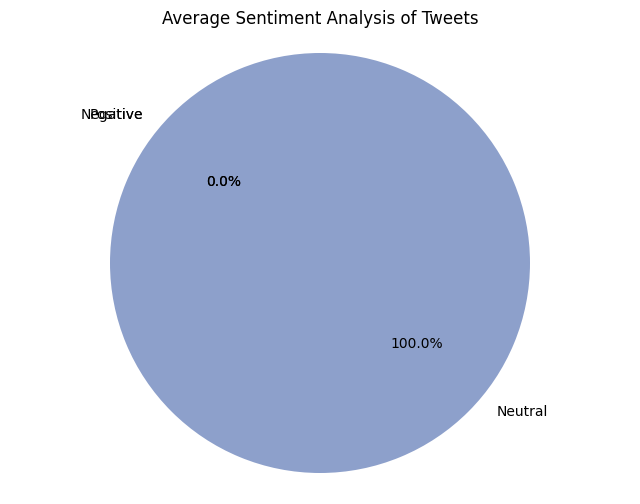

In [53]:

def plot_sentiment_pie(sentiment_scores):
    # Calculate average sentiment
    avg_sentiment = np.mean(list(sentiment_scores.values()))

    # Categorize the sentiment
    sentiment_categories = {'Positive': 0, 'Negative': 0, 'Neutral': 0}
    if avg_sentiment > 0.029:
        sentiment_categories['Positive'] = 1
    elif avg_sentiment < -0.1:
        sentiment_categories['Negative'] = 1
    else:
        sentiment_categories['Neutral'] = 1

    # Prepare data for pie chart
    labels = list(sentiment_categories.keys())
    sizes = list(sentiment_categories.values())
    
    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
    plt.title('Average Sentiment Analysis of Tweets')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

plot_sentiment_pie(sentiment_scores)